In [1]:
# Necessary packages
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import utils
import sys

In [2]:

model = 'crnngan'

orig_data_dir = "../../data/processed_orig_data/"
gen_data_dir = f"../../data/generated_data/{model}/"

# Load data

In [3]:
def load_data(data_type, dataset, perc): 
    if data_type == 'orig':
        # orig data
        sample_file_name = orig_data_dir + f'{dataset}_subsampled_train_perc_{perc}.npz'
        loaded = np.load(sample_file_name)
        orig_data = loaded['data']
        return orig_data
    else: 
        # gen data
        sample_file_name = gen_data_dir + f'{model}_gen_samples_{dataset}_perc_{perc}.npz'
        loaded = np.load(sample_file_name)
        gen_data = loaded['data']
        return gen_data
    


# Scale Data

In [4]:
class MinMaxScaler():
    """Min Max normalizer.
    Args:
    - data: original data

    Returns:
    - norm_data: normalized data
    """
    def fit_transform(self, data): 
        self.fit(data)
        scaled_data = self.transform(data)
        return scaled_data


    def fit(self, data):    
        self.mini = np.min(data, 0)
        self.range = np.max(data, 0) - self.mini
        self.mini = np.expand_dims(self.mini, 0)
        self.range = np.expand_dims(self.range, 0)
        return self
        

    def transform(self, data):
        numerator = data - self.mini
        scaled_data = numerator / (self.range + 1e-7)
        return scaled_data

    
    def inverse_transform(self, data):
        data *= self.range
        data += self.mini
        return data

In [5]:
def scale_data(orig, gen): 
    scaler_orig = MinMaxScaler( )  
    scaled_orig_data = scaler_orig.fit_transform(orig)
    scaled_gen_data = scaler_orig.transform(gen)
    return scaled_orig_data, scaled_gen_data

In [6]:
def avg_over_feat_dim(orig, gen): 
    final_orig = orig.mean(axis=2)
    final_gen = gen.mean(axis=2)
    return final_orig, final_gen

In [7]:
def shuffle_and_subsample(orig, gen, num=1000):     
    np.random.shuffle(orig)
    np.random.shuffle(gen)
    final_orig = orig[:num]
    final_gen = gen[:num]
    return final_orig, final_gen    

In [8]:
def print_all_data():
    print(orig_data.mean(axis=0).mean(axis=1))
    print(gen_data.mean(axis=0).mean(axis=1))
    
    print('scaled orig and gen data shape: ', scaled_orig_data.shape, scaled_gen_data.shape)
    print('scaled orig data mean: ', scaled_orig_data.mean())
    print('scaled gen data mean: ', scaled_gen_data.mean())
    print('final_orig shape: ', final_orig.shape)
    print('final_gen shape: ', final_gen.shape)

# Single T-SNE

(49, 24, 6) (49, 24, 6)


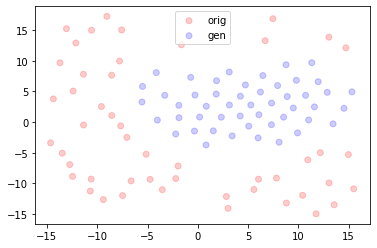

In [10]:
dataset = 'stocks'
perc = 2

orig_data = load_data('orig', dataset, perc)
gen_data = load_data('gen', dataset, perc)
print(orig_data.shape, gen_data.shape)


N, T, D = orig_data.shape
scaled_orig_data, scaled_gen_data = scale_data(orig_data, gen_data) 
scaled_orig_2d, scaled_gen_2d = avg_over_feat_dim(scaled_orig_data, scaled_gen_data) 
final_orig, final_gen = shuffle_and_subsample(scaled_orig_2d, scaled_gen_2d)

if final_orig.shape[0] != final_gen.shape[0]:
    final_orig = final_orig[:final_gen.shape[0]]

N, T = final_orig.shape
final_tsne_input = np.concatenate((final_orig, final_gen), axis = 0)        
#         print('final_tsne_input shape: ', final_tsne_input.shape)

# TSNE analysis
tsne = TSNE(n_components = 2, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(final_tsne_input)

colors = ["red" for i in range(N)] + ["blue" for i in range(N)] 

plt.scatter(tsne_results[:N,0], tsne_results[:N,1], 
            c = colors[:N], alpha = 0.2, label = 'orig')
plt.scatter(tsne_results[N:,0], tsne_results[N:,1], 
            c = colors[N:], alpha = 0.2, label='gen')

plt.legend()

plt.show()

# Plot Samples 

In [11]:
dataset, perc


('stocks', 2)

In [12]:
# dataset, perc = 'stocks', 20

orig_data = load_data('orig', dataset, perc)
gen_data = load_data('gen', dataset, perc)

N, T, D = orig_data.shape

scaled_orig_data, scaled_gen_data = scale_data(orig_data, gen_data) 
N, T, D

(49, 24, 6)

In [13]:
print(orig_data.mean(0).mean(0))
print(gen_data.mean(0).mean(0))

[1.11977030e+03 1.13045412e+03 1.11052162e+03 1.12223641e+03
 1.12223641e+03 1.47382798e+06]
[1.1829117e+03 1.1401394e+03 1.1593485e+03 1.0584758e+03 1.0602936e+03
 2.0200419e+06]


In [14]:
print(scaled_orig_data.mean(0).mean(1))
print(scaled_gen_data.mean(0).mean(1))

[0.53287981 0.48491838 0.4751887  0.45602548 0.42227851 0.42094326
 0.42744451 0.40746386 0.40392149 0.41195604 0.39089417 0.38363804
 0.39367375 0.40655568 0.38639532 0.38196629 0.39045612 0.39969339
 0.40830221 0.42568906 0.43964025 0.45359065 0.46606807 0.47928667]
[0.29798563 0.63655138 0.47854712 0.39572642 0.49264843 0.52673588
 0.51487654 0.47015004 0.48667059 0.48410738 0.48108111 0.47734059
 0.47128915 0.46318999 0.47677846 0.45170331 0.44960466 0.4489412
 0.44870306 0.42690776 0.44849962 0.44852859 0.4485997  0.44857577]


[32, 40, 2, 38, 38]


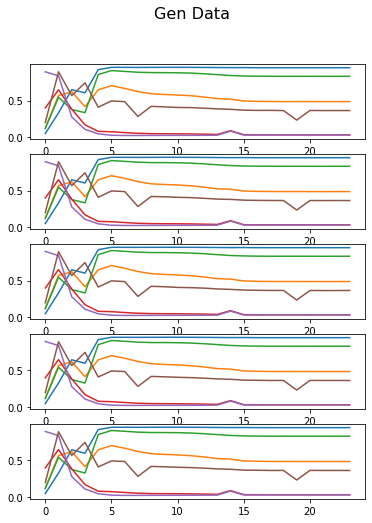

In [15]:
utils.plot_samples(scaled_gen_data, n=5, title='Gen Data')

[15, 21, 33, 33, 3]


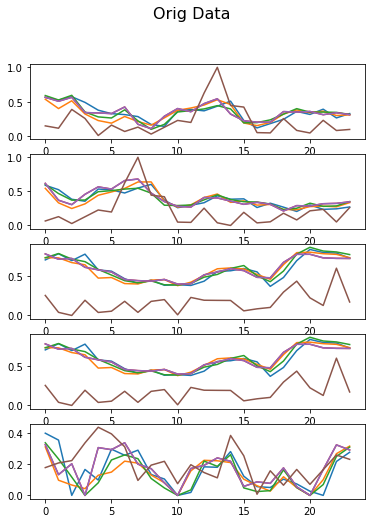

In [16]:
utils.plot_samples(scaled_orig_data, n=5, title='Orig Data')

In [32]:
#print(scaled_gen_data[271,:, 0])
#print(scaled_gen_data[421,:, 0])